# Task 2: Customer Retention & Churn Analysis
## Internship: Future Interns (Data Science & Analytics) 

**Goal:** Analyze customer and subscription data to understand why customers leave and what keeps them engaged.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the dataset downloaded from Kaggle
# Using the Telco Churn dataset as recommended in the task guidance
raw_data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Quick look at the data structure
print("Dataset Shape:", raw_data.shape)
raw_data.head()

Dataset Shape: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# The TotalCharges column is acting as an object/string, need to fix that
# There are some empty spaces that represent null values
raw_data['TotalCharges'] = pd.to_numeric(raw_data['TotalCharges'], errors='coerce')

# Checking how many nulls we have now
missing_vals = raw_data['TotalCharges'].isnull().sum()
print(f"Dropping {missing_vals} rows with empty TotalCharges")

# Cleaning up the dataframe
df = raw_data.dropna(subset=['TotalCharges']).copy()

# Converting SeniorCitizen to a more readable format for the dashboard
df['SeniorCitizen'] = df['SeniorCitizen'].replace({1: 'Yes', 0: 'No'})

print("Basic cleaning done.")

Dropping 11 rows with empty TotalCharges
Basic cleaning done.


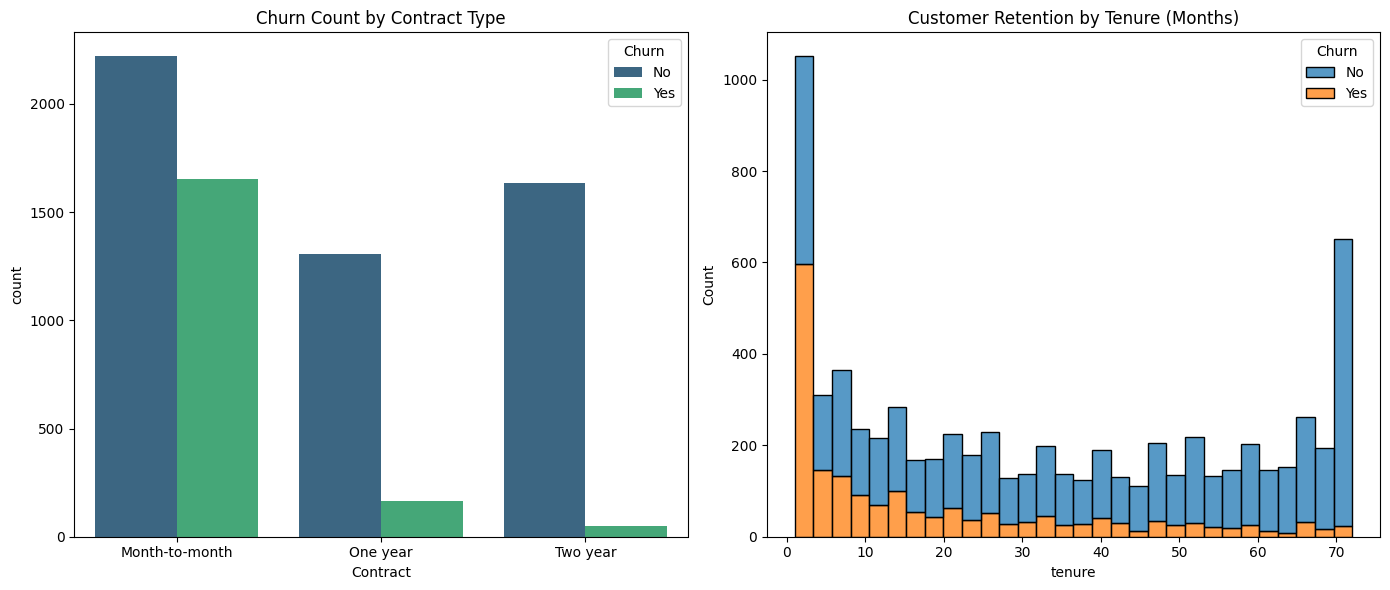

The calculated Business Churn Rate is: 26.58%


In [4]:
# Task requires identifying key retention drivers and churn reasons
plt.figure(figsize=(14, 6))

# 1. Analyzing Contract Type - a major factor in customer churn
plt.subplot(1, 2, 1)
sns.countplot(x='Contract', hue='Churn', data=df, palette='viridis')
plt.title('Churn Count by Contract Type')

# 2. Analyzing Tenure - seeing if new or old customers leave more
# We will use the 'tenure' column to see the distribution
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', bins=30)
plt.title('Customer Retention by Tenure (Months)')

plt.tight_layout()
plt.show()

# Quick calculation for the report
churn_rate = (df[df['Churn'] == 'Yes'].shape[0] / df.shape[0]) * 100
print(f"The calculated Business Churn Rate is: {churn_rate:.2f}%")

In [5]:
# Grouping tenure into yearly buckets for better dashboard segments
def categorize_tenure(months):
    if months <= 12: return '0-1 Year'
    elif months <= 24: return '1-2 Years'
    elif months <= 48: return '2-4 Years'
    else: return 'Over 4 Years'

df['Tenure_Group'] = df['tenure'].apply(categorize_tenure)

# Final export for the Power BI dashboard
df.to_csv('final_churn_analysis_data.csv', index=False)
print("File exported successfully. You are ready for Power BI!")

File exported successfully. You are ready for Power BI!
